# Project 1 - California Housing Price Prediction

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

### 1. Load the data:

In [2]:
# Read the housing file from the folder of the program
df_housing = pd.read_excel("1553768847_housing.xlsx")
# Print first few rows of this data
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.00,322,126,8.33,NEAR BAY,452600
1,-122.22,37.86,21,7099,"1,106.00",2401,1138,8.30,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.00,496,177,7.26,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.00,558,219,5.64,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.00,565,259,3.85,NEAR BAY,342200


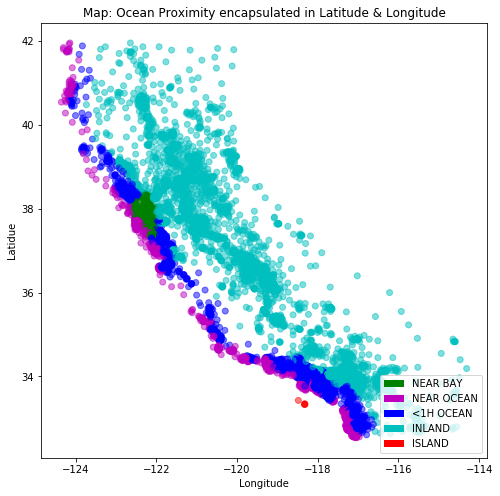

In [3]:
# When exploring the data, "longitude" & "latitude" are geographic data that may not fit directly to linear regression models 
# Unless they are engineered to be features such as distance to city centers, sea front etc. that could relate to house price
# This info seems already present in the "ocean_proximity" attribute as illustrated in the map drawn below using scatter plot
dict_colors = {'NEAR BAY':'g', 'NEAR OCEAN':'m', '<1H OCEAN':'b', 'INLAND':'c', 'ISLAND':'r'}
plt.figure(figsize=(8,8))
plt.scatter(df_housing['longitude'], df_housing['latitude'], alpha=0.5,
            c=df_housing['ocean_proximity'].map(dict_colors))
# Adding the labels
list_legends = []
for i in range(0, len(dict_colors)):
    list_legends.append(patches.Rectangle((0, 0), 1, 1, fc=list(dict_colors.values())[i]))
plt.legend(list_legends, dict_colors.keys(), loc=4)
plt.xlabel("Longitude")
plt.ylabel("Latidue")
plt.title("Map: Ocean Proximity encapsulated in Latitude & Longitude")
plt.show()

In [4]:
# The map shows landsacpe as an example of sensible data captured and could be engineered from 'latitude' & 'longitude' data
# However for now without such additional efforts, when extracting input(X), these two attributes are intentionally excluded
features_x = df_housing[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
                         'ocean_proximity']]
# Extract output(Y) from the dataset 
response_y = df_housing['median_house_value']

### 2. Handle mssing values

In [5]:
features_x = features_x.fillna(features_x.mean())
response_y = response_y.fillna(response_y.mean())
print('Features X has missing values:', features_x.isnull().values.any())
print('Response Y has missing values:', response_y.isnull().values.any())

Features X has missing values: False
Response Y has missing values: False


### 3. Encode categorical data

In [6]:
# For linear regression, categorical data is generally converted to dummy variables
features_x['near_bay'] = np.where(features_x['ocean_proximity'] == 'NEAR BAY', 1, 0)
features_x['near_ocean'] = np.where(features_x['ocean_proximity'] == 'NEAR OCEAN', 1, 0)
features_x['1h_ocean'] = np.where(features_x['ocean_proximity'] == '<1H OCEAN', 1, 0)
features_x['inland'] = np.where(features_x['ocean_proximity'] == 'INLAND', 1, 0)
features_x['island'] = np.where(features_x['ocean_proximity'] == 'ISLAND', 1, 0)
# 'INLAND' type is represented by records with all of above attributes having 0 value
# Remove 'ocean_proximity' column
del features_x['ocean_proximity']
features_x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,near_ocean,1h_ocean,inland,island
0,41,880,129.00,322,126,8.33,1,0,0,0,0
1,21,7099,"1,106.00",2401,1138,8.30,1,0,0,0,0
2,52,1467,190.00,496,177,7.26,1,0,0,0,0
3,52,1274,235.00,558,219,5.64,1,0,0,0,0
4,52,1627,280.00,565,259,3.85,1,0,0,0,0


### 4. Split the dataset

In [7]:
# Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_x, response_y, test_size=0.2, random_state=1)
print('Training dataset:')
display(x_train.describe())
print('Test dataset:')
display(x_test.describe())

Training dataset:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,near_ocean,1h_ocean,inland,island
count,"16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00"
mean,28.60,"2,639.59",539.04,"1,425.26",500.59,3.88,0.11,0.13,0.44,0.31,0.00
std,12.59,"2,176.42",418.81,"1,123.76",382.44,1.89,0.31,0.34,0.50,0.46,0.02
min,1.00,2.00,1.00,3.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00
25%,18.00,"1,451.00",297.00,786.00,279.00,2.57,0.00,0.00,0.00,0.00,0.00
50%,29.00,"2,127.00",438.00,"1,164.00",410.00,3.54,0.00,0.00,0.00,0.00,0.00
75%,37.00,"3,149.00",644.25,"1,723.00",605.25,4.75,0.00,0.00,1.00,1.00,0.00
max,52.00,"39,320.00","6,210.00","35,682.00","5,358.00",15.00,1.00,1.00,1.00,1.00,1.00


Test dataset:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,near_ocean,1h_ocean,inland,island
count,"4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00"
mean,28.78,"2,620.45",533.20,"1,426.36",495.32,3.85,0.11,0.13,0.43,0.33,0.00
std,12.58,"2,202.47",421.10,"1,166.77",381.91,1.93,0.31,0.33,0.50,0.47,0.00
min,2.00,15.00,3.00,11.00,3.00,0.50,0.00,0.00,0.00,0.00,0.00
25%,18.00,"1,437.00",297.00,790.75,281.00,2.53,0.00,0.00,0.00,0.00,0.00
50%,29.00,"2,122.00",435.50,"1,177.50",406.00,3.50,0.00,0.00,0.00,0.00,0.00
75%,37.00,"3,139.75",638.25,"1,730.00",602.00,4.73,0.00,0.00,1.00,1.00,0.00
max,52.00,"32,627.00","6,445.00","28,566.00","6,082.00",15.00,1.00,1.00,1.00,1.00,0.00


### 5. Standardize data

In [8]:
# Variables to be standardized are to exclude the dummy variables created
list_std_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Standardize the training dateset
df_train_features = x_train[list_std_features]
x_train_std = x_train.copy()
x_train_std[list_std_features] = (df_train_features - df_train_features.mean())/df_train_features.std()

# Standardize the test dataset
df_test_features = x_test[list_std_features]
x_test_std = x_test.copy()
x_test_std[list_std_features] = (df_test_features - df_test_features.mean())/df_test_features.std()

# Check if the datasets are standardized
print('Standardized training dataset:')
display(x_train_std.describe())
print('Standardized test dataset:')
display(x_test_std.describe())

Standardized training dataset:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,near_ocean,1h_ocean,inland,island
count,"16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00","16,512.00"
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.11,0.13,0.44,0.31,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,0.31,0.34,0.50,0.46,0.02
min,-2.19,-1.21,-1.28,-1.27,-1.31,-1.78,0.00,0.00,0.00,0.00,0.00
25%,-0.84,-0.55,-0.58,-0.57,-0.58,-0.69,0.00,0.00,0.00,0.00,0.00
50%,0.03,-0.24,-0.24,-0.23,-0.24,-0.18,0.00,0.00,0.00,0.00,0.00
75%,0.67,0.23,0.25,0.26,0.27,0.46,0.00,0.00,1.00,1.00,0.00
max,1.86,16.85,13.54,30.48,12.70,5.88,1.00,1.00,1.00,1.00,1.00


Standardized test dataset:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,near_bay,near_ocean,1h_ocean,inland,island
count,"4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00","4,128.00"
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.11,0.13,0.43,0.33,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,0.31,0.33,0.50,0.47,0.00
min,-2.13,-1.18,-1.26,-1.21,-1.29,-1.73,0.00,0.00,0.00,0.00,0.00
25%,-0.86,-0.54,-0.56,-0.54,-0.56,-0.68,0.00,0.00,0.00,0.00,0.00
50%,0.02,-0.23,-0.23,-0.21,-0.23,-0.18,0.00,0.00,0.00,0.00,0.00
75%,0.65,0.24,0.25,0.26,0.28,0.46,0.00,0.00,1.00,1.00,0.00
max,1.85,13.62,14.04,23.26,14.63,5.77,1.00,1.00,1.00,1.00,0.00


### 6. Perform Linear Regression

In [9]:
# Perform Linear Regression on traing data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train_std, y_train)

# Print the coefficients to understand how each feature relates to the median house price
df_coefs = pd.DataFrame({'Variable': list(x_train_std.columns),'Coefficient': linreg.coef_})
print("Variable Coefficients:")
display(df_coefs)

Variable Coefficients:


,Variable,Coefficient
0,housing_median_age,"14,843.72"
1,total_rooms,"-15,245.17"
2,total_bedrooms,"26,126.07"
3,population,"-42,099.53"
4,households,"36,495.60"
5,median_income,"76,808.47"
6,near_bay,"-19,745.27"
7,near_ocean,"-11,158.01"
8,1h_ocean,"-26,124.48"
9,inland,"-93,647.27"


In [10]:
# Predict output for test dataset using the fitted model
y_pred = linreg.predict(x_test_std)

In [11]:
# Print root mean square error (RMSE) from Linear Regression
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 70049.80902193162


### 7. Perform Linar Regression with one independent variable

In [12]:
# Extract just the median_income column from the independent variabls (from X_train and X_test)
# Not necessary to extract from standarized datasets for a single variable regression graph to be understood easier
x_train_med_income = x_train.loc[:,['median_income']]
x_test_med_income = x_test.loc[:,['median_income']]

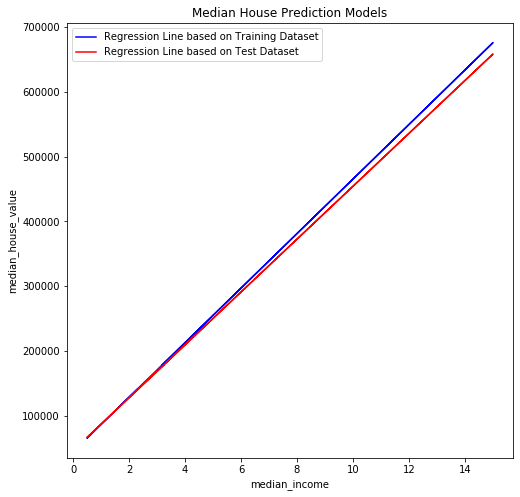

In [13]:
# Perform Linear Regression to predict housing values based on median_income
plt.figure(figsize=(8,8))
# Build Linear Regression model based on training dataset
linreg_med_income = LinearRegression()
linreg_med_income.fit(x_train_med_income, y_train)

# Predict output for test dataset using the fitted model
y_pred_med_income = linreg_med_income.predict(x_test_med_income)
# Plot the fitted model for training data 
plt.plot(x_train_med_income, linreg_med_income.coef_[0] * x_train_med_income + linreg_med_income.intercept_, color = 'b')

# Build LInear Regression model based on test dataset
linreg_med_income_test = LinearRegression()
linreg_med_income_test.fit(x_test_med_income, y_test)
# Plot the fitted model for test data
plt.plot(x_test_med_income, linreg_med_income_test.coef_[0] * x_test_med_income + linreg_med_income_test.intercept_, color = 'r')

plt.legend(labels=['Regression Line based on Training Dataset', 'Regression Line based on Test Dataset'])
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("Median House Prediction Models")
plt.show()

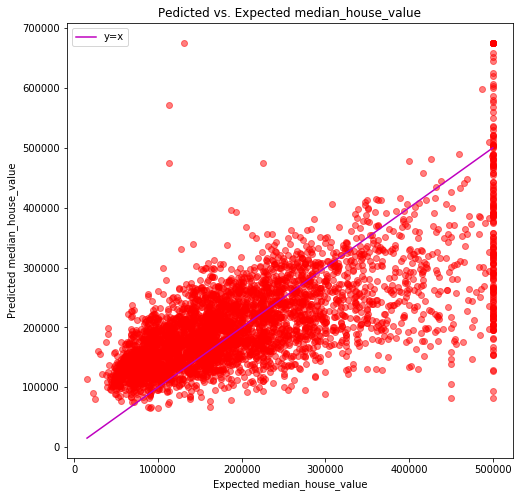

In [14]:
# While the closeness of the regression lines suggests that trained model is likely to perform similarly on the test dataset
# To understand how satifactory, the predicted is splot against expected house values to see if they are close to the y=x line
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_med_income, color='r', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , color = 'm')

plt.legend(labels=['y=x'])
plt.xlabel("Expected median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Pedicted vs. Expected median_house_value")
plt.show()

In [15]:
# The graph shows the model performs okay by predicting within about 100k difference especially for house value < 300k
# This could be further cross-checked by the root mean square error value
# However, the model tends to understimate the house value for house value between 300k and 500k
# Additionally, the group of house value at 500k does not seem to be satifactorily predicted by the model 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_med_income)))

RMSE: 83228.17849797675
